<a href="https://colab.research.google.com/github/L120Git/NLP_Google_Restaurants/blob/main/3_NLP_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0.Librerías necesarias

In [ ]:
#!pip install rarfile
#!pip install unzip
!pip install stop-words
!pip install num2words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Librerias necesarias
import numpy as np
import pandas as pd
from google.colab import drive
import random
#import rarfile # para descomprimir archivos
import json
#import csv 

#para limpiar los datos
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
nltk.download('omw-1.4')
import string
import unicodedata
from num2words import num2words
#para reducir la dimensión
from sklearn.manifold import TSNE
#para representar
import matplotlib.pyplot as plt

#análisis exloratorio
from collections import Counter
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud

#preprocesado
from stop_words import get_stop_words
import unicodedata
import re
from sklearn.utils import shuffle

#modelado
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow
from tensorflow import keras
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from sklearn.svm import SVC
from keras.layers import Embedding, LSTM, Dense, Dropout, GRUV2, SimpleRNN
import pickle #para guardar los modelos
#reporte
from sklearn.metrics import classification_report, accuracy_score, roc_curve, precision_recall_curve


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##1. Carga de datos

In [ ]:
# Montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cargamos los datos necesarios desde nuestro google drive
path = '/content/drive/MyDrive/NLP/'

train_clean = pd.read_csv(f'{path}train_clean.csv')
test_clean= pd.read_csv(f'{path}test_clean.csv')

In [ ]:
train_clean

,review_clean,sentiment_label
0,notice noodle dry like sit awhile notice_noodl...,0
1,seafood okay overall lack flavor underwhelming...,0
2,great nigiri giant cut fish great_nigiri nigir...,1
3,sister always get chicken salad croissant say ...,1
4,ive donut truck one occasion standard goto cho...,1
...,...,...
5511,lot different dip sauce great happy hour speci...,1
5512,great street taco cilantro cheese topthey tast...,1
5513,delicious large pizza great variety friendly s...,1
5514,food pork carnitas tender well season flour to...,1


In [ ]:
test_clean

,review_clean,sentiment_label
0,chicken really crispy poulet est vraiment crou...,1
1,mexican joint average nothing special except p...,0
2,pocahontas pancake locate virginia beach ocean...,0
3,woman speaker pushy slow time give diet drpepp...,0
4,grill chicken black bean rice grill_chicken ch...,1
...,...,...
1834,fry good bowl mine come half full burger come ...,0
1835,find portion small price point pay quite bite ...,1
1836,time bloody mary also order buffalo cauliflowe...,0
1837,first time beignet think amaze hot light fluff...,0


##2. Split de los datos

In [ ]:
#dividimos con las columnas 'processedReview' y las etiquetas 'sentiment_label'

#split conjunto de train
X_train = train_clean['review_clean']
y_train = train_clean['sentiment_label']

#split conjunto de test
X_test = test_clean['review_clean']
y_test = test_clean['sentiment_label']


In [ ]:
X_train.iloc[:10]

0    notice noodle dry like sit awhile notice_noodl...
1    seafood okay overall lack flavor underwhelming...
2    great nigiri giant cut fish great_nigiri nigir...
3    sister always get chicken salad croissant say ...
4    ive donut truck one occasion standard goto cho...
5    star dish ropa vieja good star dish churrasco ...
6    absolutely love saute crab finger keep come ba...
7    chicken sandwich get may odd piece cook wrong ...
8    foodeh curry chicken korean bbq beef philly ch...
9    piece sear tuna salad calamari salmon bad piec...
Name: review_clean, dtype: object

In [ ]:
# Mezclamos los datos con sus etiquetas
x_train, y_train =shuffle(train_clean['review_clean'],train_clean['sentiment_label'])
x_test,y_test =shuffle(test_clean['review_clean'],test_clean['sentiment_label'])

print(y_train.tail(20))

400     1
868     1
5010    0
476     1
5084    1
2218    0
5048    0
4275    0
433     1
4613    0
639     0
3523    0
4333    1
2954    1
5073    0
958     0
2987    0
332     1
1392    1
4987    0
Name: sentiment_label, dtype: int64


In [ ]:
#guardamos los datos X_train, X_test, y_train e y_test en nuestro /content #Recuerdo que ahora tengo un objeto de numpy (sklearn)
np.save('x_train.npy', x_train)
np.save('x_test.npy', x_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [ ]:
#compruebo que los he guardado en mi disco de colab
!ls -lah   

total 267M
drwxr-xr-x 1 root root 4.0K Mar 12 16:20 .
drwxr-xr-x 1 root root 4.0K Mar 12 13:59 ..
-rw-r--r-- 1 root root  75K Mar 12 17:52 clf2.pkl
drwxr-xr-x 4 root root 4.0K Mar  9 18:57 .config
-rw-r--r-- 1 root root  200 Mar 12 18:23 c_params.npy
drwx------ 5 root root 4.0K Mar 12 14:31 drive
-rw-r--r-- 1 root root  192 Mar 12 18:01 H_loss.npy
-rw-r--r-- 1 root root  192 Mar 12 18:01 H_val_loss.npy
-rw-r--r-- 1 root root 8.6K Mar 12 17:51 lr_model.pkl
-rw-r--r-- 1 root root 7.4K Mar 12 18:01 m_c_predict.npy
-rw-r--r-- 1 root root 160M Mar 12 18:01 model_custom.pkl
-rw-r--r-- 1 root root  52M Mar 12 17:52 model_gru.pkl
-rw-r--r-- 1 root root  52M Mar 12 17:52 model.pkl
drwxr-xr-x 1 root root 4.0K Mar  9 18:58 sample_data
-rw-r--r-- 1 root root  200 Mar 12 18:23 test_acc.npy
-rw-r--r-- 1 root root  15K Mar 12 17:52 test_predict_clf.npy
-rw-r--r-- 1 root root  15K Mar 12 18:23 test_predict.npy
-rw-r--r-- 1 root root  200 Mar 12 18:23 train_acc.npy
-rw-r--r-- 1 root root  44K Mar 12 18

In [ ]:
# lo movemos a nuestro en nuestro google drive
!cp /content/x_train.npy /content/drive/MyDrive/NLP/x_train.npy
!cp /content/x_test.npy /content/drive/MyDrive/NLP/x_test.npy
!cp /content/y_train.npy /content/drive/MyDrive/NLP/y_train.npy
!cp /content/y_test.npy /content/drive/MyDrive/NLP/y_test.npy


##3. Extracción de características

In [ ]:
# CountVectorizer
cv = CountVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.95, min_df=5)
X_train_cv = cv.fit_transform(x_train).toarray() #.toarray() para plotearlo
X_test_cv = cv.transform(x_test).toarray()

# TfIdfVectorizer 
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.95, min_df=5)
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)

In [ ]:
#guardamos las características X_train_tfidf, X_test_tfidf, en nuestro /content 
np.save('X_train_tfidf.npy', X_train_tfidf)
np.save('X_test_tfidf.npy', X_test_tfidf)

In [ ]:
#compruebo que los he guardado en mi disco de colab
!ls -lah   X_test_tfidf X_train_tfidf

ls: cannot access 'X_test_tfidf': No such file or directory
ls: cannot access 'X_train_tfidf': No such file or directory


In [ ]:
# lo movemos a nuestro en nuestro google drive
!cp /content/X_train_tfidf.npy /content/drive/MyDrive/NLP/X_train_tfidf.npy
!cp /content/X_test_tfidf.npy /content/drive/MyDrive/NLP/X_test_tfidf.npy

In [ ]:
print(list(tfidf.vocabulary_.items())[:20])

[('order', 638), ('shrimp', 807), ('poboy', 700), ('philly', 681), ('chicken', 159), ('tender', 908), ('meal', 559), ('fry', 378), ('drink', 288), ('honey', 456), ('bbq', 54), ('sauce', 779), ('order_shrimp', 647), ('chicken_tender', 175), ('bbq_sauce', 56), ('order shrimp', 642), ('chicken tender', 165), ('bbq sauce', 55), ('get', 401), ('wrong', 992)]


In [ ]:
print(len(tfidf.vocabulary_))

1000


##3.1 Frecuencia de las palabras

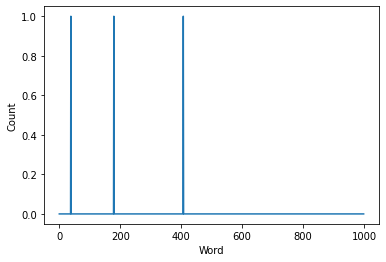

In [ ]:
#Frecuencia de las palabras
plt.plot(X_train_cv[5,:]) #CountVectorized train en array
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

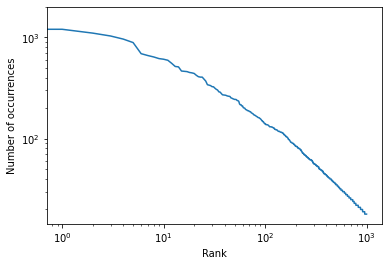

In [ ]:

#Observamos la ley de Zipf
word_freq = X_train_cv.sum(axis=0)

sorted_word_freq = np.sort(word_freq)[::-1]

plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

###3.2 Score IDF de algunas palabras

In [ ]:
words_example = [
    'sauce',
    'very',
    'good',
    'amazing',
    'great',
    'fresh',
    'fish',
    'deviled',
    'but',
    'was',
    'never',
    'not',
    'wasn´t'
]

In [ ]:
vocab_idf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

print('{0:20}{1:20}'.format('Palabra', 'IDF'))
for word in words_example:
    if word not in vocab_idf:
        print('{0:20}{1:20}'.format(word, 'OOV'))
    else:
        print('{0:20}{1:2.3f}'.format(word, vocab_idf[word]))

Palabra             IDF                 
sauce               3.691
very                OOV                 
good                2.435
amazing             OOV                 
great               3.275
fresh               3.918
fish                3.995
deviled             OOV                 
but                 OOV                 
was                 OOV                 
never               5.590
not                 OOV                 
wasn´t              OOV                 


###3.3 Palabras con el TF-IDF en alguna review

In [ ]:
i = random.randint(0, len(x_train))
print('ID: {}'.format(i))
print('Sentiment: {}'.format(y_train.iloc[i]))
print('Review: {}'.format(x_train.iloc[i]))

ID: 2933
Sentiment: 0
Review: begin pink lemonade water pepper order fry mac cheese fry cheese ravioli entree consist cannelloni shrimp chicken fettucine alfredo chicken pink tortellini end slice strawberry cheese cake let say food delicious cannelloni tad bite salty noodle pink tortellini delicious chicken alfredo tad bite dry strawberry cheesecake definitely smooth graham crust soft well also begin_pink pink_lemonade lemonade_water water_pepper pepper_order order_fry fry_mac mac_cheese cheese_fry fry_cheese cheese_ravioli ravioli_entree entree_consist consist_cannelloni cannelloni_shrimp shrimp_chicken chicken_fettucine fettucine_alfredo alfredo_chicken chicken_pink pink_tortellini tortellini_end end_slice slice_strawberry strawberry_cheese cheese_cake cake_let let_say say_food food_delicious delicious_cannelloni cannelloni_tad tad_bite bite_salty salty_noodle noodle_pink pink_tortellini tortellini_delicious delicious_chicken chicken_alfredo alfredo_tad tad_bite bite_dry dry_strawber

In [ ]:
doc_vector = X_train_tfidf[i]
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=tfidf.get_feature_names_out(), columns=['tfidf'])
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

top_n = 10
print('Top {} words with highest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[:top_n]))
print('\nTop {} words with lowest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[-top_n:]))

Top 10 words with highest TF_IDF in the review 2933:
               tfidf
alfredo     0.329671
strawberry  0.305748
cheese      0.271879
chicken     0.235478
bite        0.220336
delicious   0.179903
consist     0.178808
ravioli     0.172546
cheese fry  0.171452
cheese_fry  0.171452

Top 10 words with lowest TF_IDF in the review 2933:
           tfidf
slice   0.127679
noodle  0.123607
cake    0.121866
say     0.119449
dry     0.118991
well    0.106603
also    0.095576
food    0.094952
shrimp  0.094523
order   0.077670


###3.4 Chi2(χ²) scores

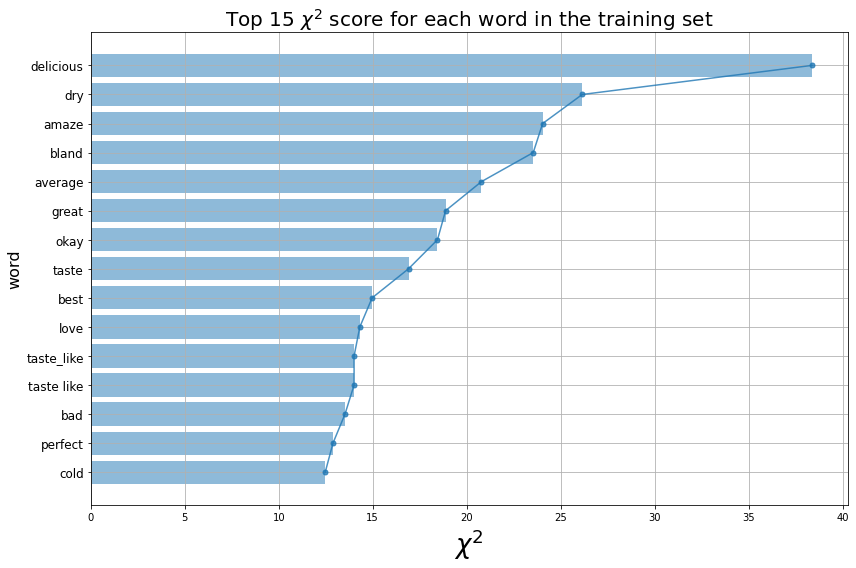

In [ ]:
# Compute the chi-squared score for each word in the training set and show the values
i = 15

chi2score = chi2(X_train_tfidf, y_train)[0]
scores = list(zip(cv.get_feature_names_out(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

## 4. Entrenamiento modelo de clasificación binaria 

In [ ]:
#Regresión logística
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000] #lista de parámetros

train_acc = list()
test_acc = list()
for c in c_params:
    lr_model = LogisticRegression(C=c, solver='lbfgs', max_iter=1000)
    lr_model.fit(X_train_tfidf, y_train)
    
    train_predict = lr_model.predict(X_train_tfidf)
    test_predict = lr_model.predict(X_test_tfidf) ####
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.6182707993474714
Accuracy for C=0.05: 0.7139749864056553
Accuracy for C=0.25: 0.7166938553561718
Accuracy for C=0.5: 0.7166938553561718
Accuracy for C=1: 0.7145187601957586
Accuracy for C=10: 0.7009244154431756
Accuracy for C=100: 0.6982055464926591
Accuracy for C=1000: 0.6992930940728657
Accuracy for C=10000: 0.6992930940728657


In [ ]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[562 278]
 [275 724]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       840
           1       0.72      0.72      0.72       999

    accuracy                           0.70      1839
   macro avg       0.70      0.70      0.70      1839
weighted avg       0.70      0.70      0.70      1839

Accuracy score:0.6992930940728657


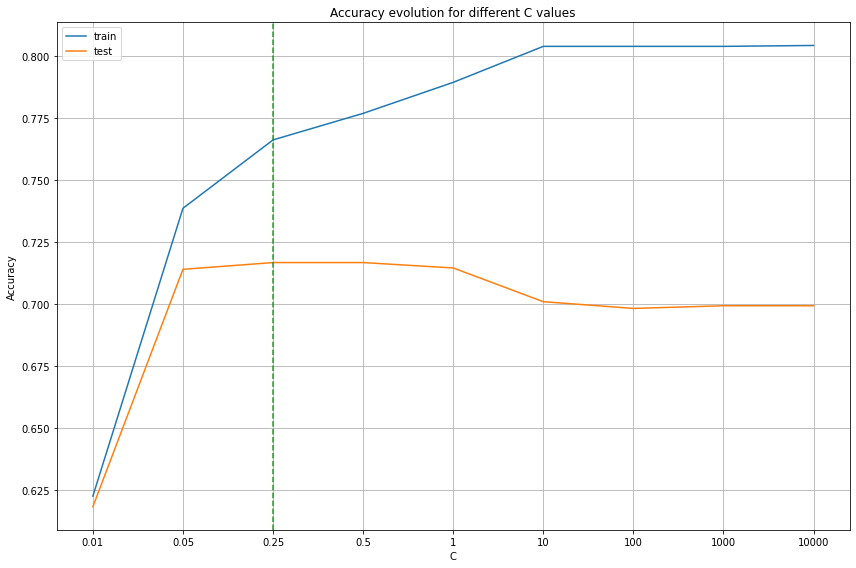

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [ ]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

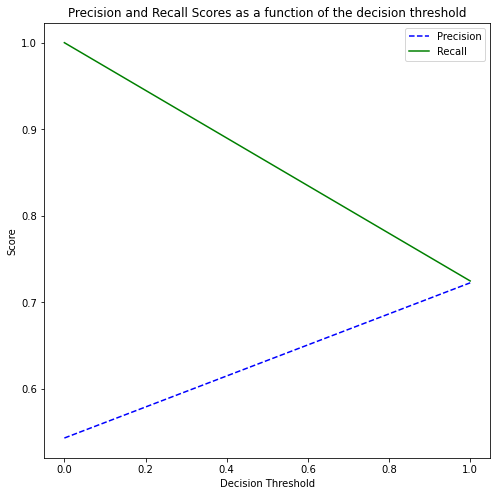

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

### 4.1 Predicción

In [ ]:
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(test_clean.iloc[review_index]['sentiment_label']))
    r = test_clean.iloc[review_index]['review_clean']
    print('Prediction: {}'.format(lr_model.predict(tfidf.transform([r]))))

In [ ]:
for i in random.sample(range(0, len(test_clean)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr_model)


Review no. 594
Actual sentiment: 0
Prediction: [0]

Review no. 1603
Actual sentiment: 1
Prediction: [1]

Review no. 828
Actual sentiment: 1
Prediction: [1]

Review no. 1649
Actual sentiment: 0
Prediction: [1]

Review no. 94
Actual sentiment: 1
Prediction: [0]


In [ ]:
#guardamos las características X_train_tfidf, X_test_tfidf, en nuestro /content 
np.save('train_predict.npy', train_predict)
np.save('test_predict.npy', test_predict) 
np.save('train_acc.npy', train_acc) 
np.save('test_acc.npy', test_acc)
np.save('c_params.npy', c_params)

In [ ]:
#compruebo que los he guardado en mi disco de colab
!ls -lah   train_predict test_predict train_acc test_acc c_params

ls: cannot access 'train_predict': No such file or directory
ls: cannot access 'test_predict': No such file or directory
ls: cannot access 'train_acc': No such file or directory
ls: cannot access 'test_acc': No such file or directory
ls: cannot access 'c_params': No such file or directory


In [ ]:
# lo movemos a nuestro en nuestro google drive
!cp /content/train_predict.npy /content/drive/MyDrive/NLP/train_predict.npy
!cp /content/test_predict.npy /content/drive/MyDrive/NLP/test_predict.npy
!cp /content/train_acc.npy /content/drive/MyDrive/NLP/train_acc.npy
!cp /content/test_acc.npy /content/drive/MyDrive/NLP/test_acc.npy
!cp /content/c_params.npy /content/drive/MyDrive/NLP/c_params.npy

In [ ]:
#guardamos el modelo en nuestro drive de colab
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [ ]:
# movemos nuestro modelo al Google Drive
!cp lr_model.pkl /content/drive/MyDrive/NLP/lr_model.pkl


In [ ]:
#Comprobamos
!ls -lah lr_model.pkl

-rw-r--r-- 1 root root 8.6K Mar 12 18:36 lr_model.pkl


## 5. Entrenamiento de un modelo con árboles de predicción

In [ ]:
#Grid search del gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
        'n_estimators': [16, 32, 64],
        'learning_rate': [0.1, 0.5, 1.0],
        'max_depth': [1, 2, 3]
}
    
def grid_gboost(X_train, X_test, y_train, y_test):  
    #creo el clasificador      
    clf = GradientBoostingClassifier(random_state=42) #n_estimators=n_estimators, learning_rate=1.0,  max_depth=1

    #meto una grid_search para buscar los mejores parámetros de entrenamiento
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)
    clf.fit(X_train_tfidf, y_train)
    
    #guardo los mejores parámetros
    best_params = grid_search.best_params_

    return best_params

In [ ]:
#sacamos los best_params con nuestros datos 
best_params = grid_gboost(X_train_tfidf,X_test_tfidf,y_train,y_test)
#entrenamos de nuevo con los mejores parámetros 
clf2 = GradientBoostingClassifier(**best_params, random_state=42)
clf2.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=64,
                           random_state=42)

In [ ]:
#predict y algunas métricas
test_predict_clf= clf2.predict(X_test_tfidf)

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict_clf)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict_clf)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict_clf)))

Confusion matrix:
[[533 307]
 [210 789]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       840
           1       0.72      0.79      0.75       999

    accuracy                           0.72      1839
   macro avg       0.72      0.71      0.71      1839
weighted avg       0.72      0.72      0.72      1839

Accuracy score: 0.7189


In [ ]:
#guardamos los datos en nuestro drive
np.save('test_acc.npy', test_acc)
np.save('c_params.npy', c_params)

#la predición del gboost classif
np.save('test_predict_clf.npy',test_predict_clf)

In [ ]:
#guardamos el modelo en nuestro drive de colab
with open('clf2.pkl', 'wb') as f:
    pickle.dump(clf2, f)

In [ ]:
# movemos nuestro modelo al Google Drive
!cp clf2.pkl /content/drive/MyDrive/NLP/clf2.pkl
!cp test_predict_clf.npy /content/drive/MyDrive/NLP/test_predict_clf.npy

In [ ]:
#Comprobamos
!ls -lah clf2.pkl test_predict_clf.npy

-rw-r--r-- 1 root root 47K Mar 12 18:36 clf2.pkl
-rw-r--r-- 1 root root 15K Mar 12 18:36 test_predict_clf.npy


##6. Modelado Deep Learning

### 6.1 Preparación de los datos 

In [ ]:
# Media de palabras en la reviews.
# RRN necesitamos establcer el tamaño de neruonas 
# primero hacer el análisis para ver el número medio y máximo de palabras en las reviews.
#si una frase se queda corta, la palabrs restantes se rellenaran de 0. Esto sería negativop
max = 0
mean = []
for example in x_train:
  length = len(example)
  mean.append(len(example))
  if length > max:
    max = length

In [ ]:
sum(mean) / len(mean)

505.57124728063815

In [ ]:
max

5042

In [ ]:
#preparamos X_train y X_test para la CNN
mx_w = max #número máx de palabras 
tokenizer = Tokenizer(num_words= mx_w)

x_train_tkns = tokenizer.texts_to_sequences(x_train) #tokenizamos cada frase en una secuencia numérica
x_test_tkns = tokenizer.texts_to_sequences(x_test)


In [ ]:
max_words = 500 #escogemos una muestra del max de palabras del conjunto de entrenamiento
#hacemos el padding
X_train = pad_sequences(x_train_tkns, maxlen=max_words)
X_test = pad_sequences(x_test_tkns, maxlen=max_words)

In [ ]:
# Vectorizador, extractor de características
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=500, 
    strip_accents='ascii',
    ngram_range=(1, 1)
)

X_train_ = cv.fit_transform(x_train)
X_test_ = cv.transform(x_test)

###6.2 Creación del modelo

In [ ]:
embedding_size = 32
vocabulary_size= 138683 #total_words (train, con el que entrenamos)
#modelo
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           4437856   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,496,157
Trainable params: 4,496,157
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train_ = X_train_.toarray()
X_test_ = X_test_.toarray()

In [ ]:
batch_size = 64
num_epochs = 1

model.fit(X_train_, y_train, #con el vector de caracteristicas
          validation_split=0.2,
          batch_size=batch_size, epochs=num_epochs)

69/69 [==============================] - 6s 34ms/step - loss: 0.6937 - accuracy: 0.5020 - val_loss: 0.6922 - val_accuracy: 0.5217


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.5432299971580505


In [ ]:
#guardamos el modelo en nuestro drive de colab
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-12 18:36:44           64
config.json                                    2023-03-12 18:36:44         2629
variables.h5                         

In [ ]:
# movemos nuestro modelo al Google Drive
!cp model.pkl /content/drive/MyDrive/NLP/model.pkl


In [ ]:
#Comprobamos
!ls -lah model.pkl

-rw-r--r-- 1 root root 52M Mar 12 18:36 model.pkl


Vamos a ver con GRU:

In [ ]:
embedding_size = 32
model_gru = Sequential()
model_gru.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_gru.add(GRUV2(100))
model_gru.add(Dense(1, activation='sigmoid'))

print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           4437856   
                                                                 
 gru (GRU)                   (None, 100)               40200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,478,157
Trainable params: 4,478,157
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 1

#X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]  # first batch_size samples
#X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]  # rest for training

model_gru.fit(X_train_, y_train,
          validation_split=0.20,
          batch_size=batch_size, epochs=num_epochs)

69/69 [==============================] - 4s 30ms/step - loss: 0.6937 - accuracy: 0.5057 - val_loss: 0.6928 - val_accuracy: 0.5217


In [ ]:
scores = model_gru.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.5432299971580505


In [ ]:
#guardamos el modelo en nuestro drive de colab
with open('model_gru.pkl', 'wb') as f:
    pickle.dump(model_gru, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......gru
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-12 18:36:50           64
config.json                                    2023-03-12 18:36:50         2206
variables.h5                                   2023-03-12 18:36:50     53763672


In [ ]:
# movemos nuestro modelo al Google Drive
!cp model_gru.pkl /content/drive/MyDrive/NLP/model_gru.pkl


In [ ]:
#Comprobamos
!ls -lah model_gru.pkl

-rw-r--r-- 1 root root 52M Mar 12 18:36 model_gru.pkl


La acurracy no mejora. Vamos a probar con RNN:

In [ ]:
embedding_size = 32
model_rnn = Sequential()
model_rnn.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(1, activation='sigmoid'))

print(model_rnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           4437856   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,451,257
Trainable params: 4,451,257
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 1

model_rnn.fit(X_train_, y_train,
          validation_split=0.2,
          batch_size=batch_size, epochs=num_epochs)

69/69 [==============================] - 28s 384ms/step - loss: 0.6981 - accuracy: 0.4903 - val_loss: 0.6942 - val_accuracy: 0.5217


In [ ]:
scores = model_rnn.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.5432299971580505


#####Sigue sin mejorar, vamos a meterle el w2v de embedding

# 5. LSTM + word2vec Embedding

In [ ]:
#remember: mis tokens son: x_train y x_test con y_train e y_test
# y los paddings son x_train_tkns y x_test_tkns

#cargamos los modelos del w2v
path = '/content/drive/MyDrive/NLP/'

with open(f'{path}w2v_model.pkl', 'rb') as f:
    w2v_model_tr = pickle.load(f)
with open(f'{path}w2v_model_ts.pkl', 'rb') as f:
    w2v_model_ts = pickle.load(f)

In [ ]:
# Parámetros del WORD2VEC
W2V_SIZE = 300 # tamaño de vectores
W2V_WINDOW = 7 # número de palabras que va a mirar alrededor
# 32
W2V_EPOCH = 5 # número de epoca
W2V_MIN_COUNT = 2 #número mínimo de frecuencia

# KERAS
SEQUENCE_LENGTH = 500 # número de secuencias de keras

In [ ]:
# Generamos la capa de embeddings

def generate_embedding(word2vec_model, vocab_size, tokenizer):
    embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
    return Embedding(
        vocab_size,
        W2V_SIZE,
        weights=[embedding_matrix],
        input_length=SEQUENCE_LENGTH, 
        trainable=True,
    )


In [ ]:
import numpy as np
embedding_layer = generate_embedding(w2v_model_tr, vocabulary_size, tokenizer)

In [ ]:
model_custom = Sequential()
#pasamos directamente la capa que hemos generado de embedding
model_custom.add(embedding_layer)
model_custom.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_custom.add(Dense(1, activation="sigmoid"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.05, decay=0.05/ 20) #1e-3
model_custom.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"]) 

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
batch_size = 128
num_epochs = 8 

#X_train_words_valid, y_valid = X_train_wor[:batch_size], y_train[:batch_size]  # first batch_size samples
#X_train_words2, y_train2 = X_train_words[batch_size:], y_train[batch_size:]  # rest for training

H_custom = model_custom.fit(X_train_, y_train,
          validation_split=0.2,
          batch_size=batch_size, epochs=num_epochs)

Epoch 1/8
35/35 [==============================] - 62s 2s/step - loss: 0.7182 - accuracy: 0.5007 - val_loss: 0.6937 - val_accuracy: 0.5217
Epoch 2/8
35/35 [==============================] - 58s 2s/step - loss: 0.6976 - accuracy: 0.5061 - val_loss: 0.7060 - val_accuracy: 0.5217
Epoch 3/8
35/35 [==============================] - 58s 2s/step - loss: 0.6986 - accuracy: 0.5048 - val_loss: 0.6958 - val_accuracy: 0.4774
Epoch 4/8
35/35 [==============================] - 58s 2s/step - loss: 0.6946 - accuracy: 0.5023 - val_loss: 0.6978 - val_accuracy: 0.4774
Epoch 5/8
35/35 [==============================] - 58s 2s/step - loss: 0.6934 - accuracy: 0.5048 - val_loss: 0.6927 - val_accuracy: 0.5217
Epoch 6/8
35/35 [==============================] - 58s 2s/step - loss: 0.6934 - accuracy: 0.5136 - val_loss: 0.6929 - val_accuracy: 0.5226
Epoch 7/8
35/35 [==============================] - 58s 2s/step - loss: 0.6952 - accuracy: 0.5009 - val_loss: 0.6939 - val_accuracy: 0.5217
Epoch 8/8
35/35 [==========

In [ ]:
#predicciones
m_c_predict = (model_custom.predict(X_test_) > 0.5).astype("int32")

58/58 [==============================] - 8s 127ms/step


In [ ]:
#mostramos algunas métricas 
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, m_c_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, m_c_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, m_c_predict)))

Confusion matrix:
[[  9 831]
 [ 12 987]]

Classification report:
              precision    recall  f1-score   support

           0       0.43      0.01      0.02       840
           1       0.54      0.99      0.70       999

    accuracy                           0.54      1839
   macro avg       0.49      0.50      0.36      1839
weighted avg       0.49      0.54      0.39      1839

Accuracy score: 0.5416


In [ ]:
H_loss = H_custom.history['loss']
H_val_loss = H_custom.history['val_loss']

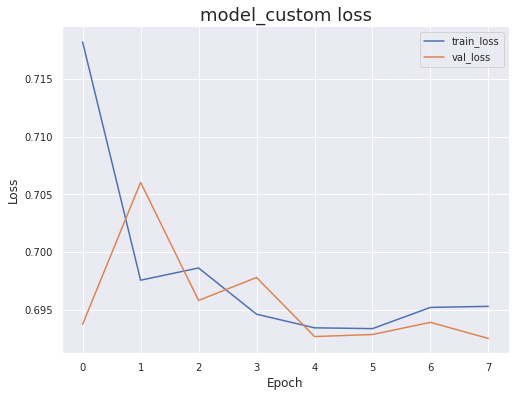

In [ ]:
#representamos la gráfica de perdidas
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(H_loss, label='train_loss')
plt.plot(H_val_loss, label='val_loss')
plt.title('model_custom loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

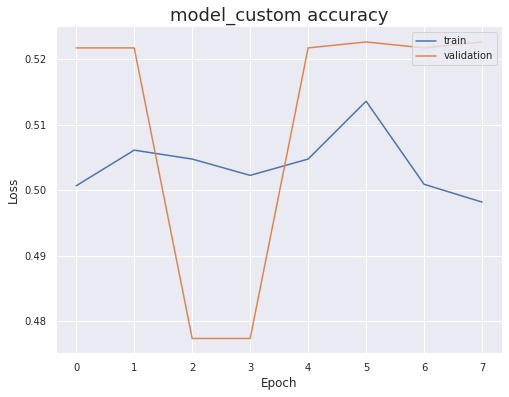

In [ ]:
#representamos la gráfica de precisión
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(H_custom.history['accuracy'], label='train')
plt.plot(H_custom.history['val_accuracy'], label='validation')
plt.title('model_custom accuracy', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [ ]:
#guardamos los datos en nuestro drive
np.save('H_loss.npy', H_loss)
np.save('H_val_loss.npy', H_val_loss)
np.save('m_c_predict.npy', m_c_predict)

In [ ]:
#guardamos el modelo en nuestro drive de colab
with open('model_custom.pkl', 'wb') as f:
    pickle.dump(model_custom, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-12 18:45:56           64
config.json                                    2023-03-12 18:45:56         2473
variables.h5                                   2023-03-12 18:45:56    167080320


In [ ]:
# movemos nuestro modelo al Google Drive
!cp model_custom.pkl /content/drive/MyDrive/NLP/model_custom.pkl 
!cp m_c_predict.npy /content/drive/MyDrive/NLP/m_c_predict.npy
!cp H_loss.npy /content/drive/MyDrive/NLP/H_loss.npy
!cp H_val_loss.npy /content/drive/MyDrive/NLP/H_val_loss.npy

In [ ]:
#Comprobamos
!ls -lah model_custom.pkl  m_c_predict H_loss.npy H_val_loss.npy

ls: cannot access 'm_c_predict': No such file or directory
-rw-r--r-- 1 root root  192 Mar 12 18:45 H_loss.npy
-rw-r--r-- 1 root root  192 Mar 12 18:45 H_val_loss.npy
-rw-r--r-- 1 root root 160M Mar 12 18:45 model_custom.pkl
